    This is the 2nd part after all the preprocessing were done in the first step.
    This is done on Google colab.
    Contents- vocabulary-dictionary,Middle frequency range words,HAL l2r and R2l, simlilarity function, manually obtained similar words and given rating for some middle freuency range words, checking how HAL works comparing manual rating and score

Importing the created modified corpus from the google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Reading the modified corpus

In [0]:
corpus = open('/content/drive/My Drive/Corpus.txt', encoding='utf-8').readlines()

Checking the type of the corpus

    It got saved in the drive as list.
    The corpus is in the list.
    So our actual corpus is corpus[0]

In [4]:
type(corpus)

list

In [5]:
type(corpus[0])

str

In [0]:
data=corpus[0]

Forming the count dictionary

In [0]:
count_dict = {}
for word in data.split(" "):
    try:
        if len(word) >= 1:
            count_dict[word] += 1
    except:
        count_dict[word] = 1

Removing the words with count less than 20

In [0]:
for key in list(count_dict.keys()):
    if count_dict[key] <= 20:
        del count_dict[key]

Sorting the words according to decresing frequency

In [0]:
sorted_tuple = sorted(count_dict.items(), key=lambda kv: kv[1],reverse=True)

In [10]:
len(sorted_tuple)  ### after removing the low frequency words

54560

Creating list of sorted words, sorted counts and a dictionaty containing words with sorted frequency

In [0]:
sorted_counts=[]
sorted_words=[]
sorted_dic={}
for i in range(len(sorted_tuple)):
    sorted_words.append(sorted_tuple[i][0])
    sorted_counts.append(sorted_tuple[i][1])
    sorted_dic[sorted_tuple[i][0]]=sorted_tuple[i][1]

Checking the most frequent words (first 15)


In [12]:
sorted_tuple[:15]

[('এবং', 512976),
 ('করে', 354079),
 ('হয়', 345185),
 ('থেকে', 247971),
 ('ছিল', 221431),
 ('একটি', 220558),
 ('করা', 179914),
 ('তিনি', 179285),
 ('তার', 179264),
 ('করেন', 159306),
 ('জন্য', 156824),
 ('কুয়েতের', 153338),
 ('সালে', 135199),
 ('কুয়েত', 133169),
 ('তাদের', 126541)]

Verifying Zipf's law

    Computing the constant k 

In [13]:
import math

n = len(count_dict) # no. of word types

T = sum(sorted_counts) # no. of tokens

def H_approx(n):
    """
    Returns an approximate value of n-th harmonic number.
    http://en.wikipedia.org/wiki/Harmonic_number
    """
    # Euler-Mascheroni constant
    gamma = 0.57721566490153286060651209008240243104215933593992
    return gamma + math.log(n) + 0.5/n - 1./(12*n**2) + 1./(120*n**4)


k = T/H_approx(n)
exp_freq = list(k/i for i in range(1,11))
obs_freq = list(sorted_tuple[i][1] for i in range(len(count_dict)))
label = list(sorted_tuple[i][0] for i in range(10))

list(zip(label, obs_freq,exp_freq))  ### Printing the observed and expected frequencies of some similar words


[('এবং', 512976, 2368530.055295073),
 ('করে', 354079, 1184265.0276475365),
 ('হয়', 345185, 789510.018431691),
 ('থেকে', 247971, 592132.5138237682),
 ('ছিল', 221431, 473706.0110590146),
 ('একটি', 220558, 394755.0092158455),
 ('করা', 179914, 338361.4364707247),
 ('তিনি', 179285, 296066.2569118841),
 ('তার', 179264, 263170.006143897),
 ('করেন', 159306, 236853.0055295073)]

In [14]:
k  ##printing the constant

2368530.055295073

Creating a list which stores the expected frequencies

In [0]:
import numpy as np
l=[]
counts = np.array(sorted_counts)
k=2368530.055295073
for i in range(1,len(counts)+1):
  l.append(k/i)

Plotting the log rank and log frequencies using loglog plot

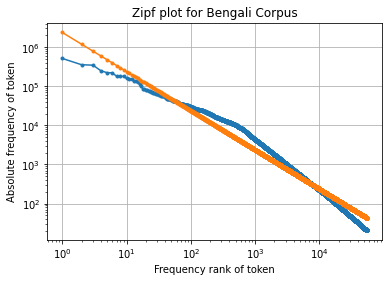

In [16]:
from pylab import *
import numpy as np

counts = np.array(sorted_counts)
tokens = np.array(sorted_words)

# A Zipf plot
ranks = np.arange(1, len(counts)+1)
indices = [i for i in range(len(sorted_counts))]
frequencies = counts[indices]
exp_val = np.array(l)
loglog(ranks, frequencies, marker=".")
loglog(ranks, exp_val, marker=".")

title("Zipf plot for Bengali Corpus")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)


    We can see the two curves.They are not very far from each other for most of the words. We can say that there is slight deviation from Zipf's law for this text corpora.

Middle Frequency Range and words

      ### One way to obatain


In [0]:
mid_freq_from_zipf=(max(l)+min(l))/2

In [18]:
mid_freq_from_zipf

1184286.7333848467

In [0]:
def find_mid_freq_words(mid_freq_from_zipf,window):
  mid_range_words=[]
  for i in sorted_dic.keys():
    a=mid_freq_from_zipf*(1-window)
    b=mid_freq_from_zipf*(1+window)
    if sorted_dic[i]>a and sorted_dic[i]<b:
      mid_range_words.append(i)
  return mid_range_words    

In [20]:
len(find_mid_freq_words(mid_freq_from_zipf,0.99))   ### no of mid frequency range words

407

    ### Another way to obtain 

In [0]:
min_freq=sorted_counts[-1]
max_freq=sorted_counts[0]
mid_frequency=round((max_freq-min_freq)/2)

In [22]:
mid_frequency

256478

In [0]:
def find(number,window):
  output=[]
  minimum=number-window
  maximum=number+window
  for i in sorted_dic.keys():
    if sorted_dic[i]  in range(minimum,maximum):
      output.append(i)
  return(output)    

In [24]:
len(find(mid_frequency,245000))   ### no of mid frequency range words

424

Printing the words

In [26]:
print(find(mid_frequency,245000))

['করে', 'হয়', 'থেকে', 'ছিল', 'একটি', 'করা', 'তিনি', 'তার', 'করেন', 'জন্য', 'কুয়েতের', 'সালে', 'কুয়েত', 'তাদের', 'যায়', 'সাথে', 'সাবাহ', 'মধ্যে', 'প্রথম', 'তারা', 'হয়ে', 'করার', 'হিসেবে', 'থাকে', 'সালের', 'অত্তোমান', 'ছিলেন', 'এটি', 'কুয়েতে', 'তথ্যসূত্র', 'সময়', 'অর্থনৈতিক', 'উপর', 'কুয়েতি', 'প্রধান', 'বেশি', 'একজন', 'করতে', 'পূর্বে', 'পরিবার', 'রয়েছে', 'নিয়ে', 'দেয়', 'শুরু', 'বিভিন্ন', 'চলচ্চিত্র', 'জন্ম', 'কারণে', 'পর্যন্ত', 'কিছু', 'হয়েছিল', 'ব্রিটিশ', 'দ্বারা', 'সাবাহদের', 'ব্যবসায়ী', 'বছর', 'আন্তর্জাতিক', 'পরে', 'মতো', 'কিন্তু', 'হয়েছে', 'মাধ্যমে', 'জাতীয়', 'অন্যান্য', 'বলে', 'অত্তোমানরা', 'ক্ষমতা', 'ব্যবস্থা', 'কারণ', 'করতো', 'সাবাহর', 'বলা', 'সবচেয়ে', 'ক্রিকেট', 'যদিও', 'বাংলাদেশের', 'দিয়ে', 'পুরস্কার', 'শাসনের', 'বহিঃসংযোগ', 'কাজ', 'পারে', 'অনেক', 'ভারতের', 'অংশ', 'কাছে', 'দক্ষিণ', 'কোন', 'সম্পর্ক', 'জেলার', 'ব্যবহার', 'নাম', 'তাকে', 'রাজনৈতিক', 'ছিলনা', 'ভাষা', 'পুনর্নির্দেশ', 'মোহাম্মদ', 'স্থাপন', 'দিকে', 'প্রতিষ্ঠিত', 'করেছেন', 'অবস্থিত', 'চলে', 'বাণিজ্যিক', 

    HAL, Finding similar words

Using NLTK to find the n-grams

In [0]:
from nltk import ngrams

In [0]:
words=corpus[0].split()

In [0]:
n = 11
grams11 = ngrams(words, n)

In [0]:
vocab_idx = {}
hal_l2r   = {}
hal_r2l   = {}

In [0]:
for word in words:
  if word not in vocab_idx.keys():
    vocab_idx[word]= 0
  else:
    pass


In [0]:
i=0
for word in vocab_idx.keys():
    vocab_idx[word]= i
    i=i+1

In [0]:
import pickle

Saving the vocab dictionary

      Saved it so that we can import without running all codes

In [0]:
pickle_out=open("/content/drive/My Drive/Text_analytics/vocab_index.pickle","wb")
pickle.dump(vocab_idx,pickle_out)
pickle_out.close()

Importing the vocab dictionary

In [0]:
pickle_in=open("/content/drive/My Drive/Text_analytics/vocab_index.pickle","rb")
vocab_idx=pickle.load(pickle_in)
pickle_in.close()   


In [0]:
ramp = [0, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

Creating the HAL matrix

Left to Right and Right to left

In [0]:
for index, grams in enumerate(grams11):
    reversed_grams = grams[::-1]
    if None not in grams:
        for idx, gram in enumerate(grams):  # Left to right
            hal_l2r[vocab_idx[grams[0]], vocab_idx[grams[idx]]] =0

        for idx, gram in enumerate(reversed_grams):  # right to left
            hal_r2l[vocab_idx[reversed_grams[0]], vocab_idx[reversed_grams[idx]]] =0

In [0]:
# We can also use this code to get the hal r2l from hal l2r

# hal_r2l={}
# for i in hal_l2r.keys():
#       a,b=i
#       hal_r2l[(b,a)]=hal_l2r[i]

In [0]:
for index, grams in enumerate(grams11):
    reversed_grams = grams[::-1]
    if None not in grams:
        for idx, gram in enumerate(grams):  # Left to right
            hal_l2r[vocab_idx[grams[0]], vocab_idx[grams[idx]]] += ramp[idx] #h5py dataset for l2r

      Saving the Hal l2r  dictionary to avoid running the code again next time

In [0]:
pickle_out=open("/content/drive/My Drive/Text_analytics/hal_l2r.pickle","wb")
pickle.dump(hal_l2r,pickle_out)
pickle_out.close()

In [0]:
for index, grams in enumerate(grams11):
    reversed_grams = grams[::-1]
    if None not in grams:
        for idx, gram in enumerate(reversed_grams):  # right to left
            hal_r2l[vocab_idx[reversed_grams[0]], vocab_idx[reversed_grams[idx]]] += ramp[idx]


    Saving the Hal r2l  dictionary to avoid running the code again next time

In [0]:
pickle_out=open("/content/drive/My Drive/Text_analytics/hal_r2l.pickle","wb")
pickle.dump(hal_r2l,pickle_out)
pickle_out.close()

Importing the Hal_l2r and Hal_r2l dictionaries

In [0]:
pickle_in=open("/content/drive/My Drive/Text_analytics/hal_l2r.pickle","rb")
hal_l2r=pickle.load(pickle_in)
pickle_in.close()

In [0]:
pickle_in=open("/content/drive/My Drive/Text_analytics/hal_r2l.pickle","rb")
hal_r2l=pickle.load(pickle_in)
pickle_in.close()

      Function to get the word vector uing HAL

In [0]:
## we can get the hal r2l from hal l2r
# So we find two vector representations and take average of both of them

def word_vector_l2r(word):
    word_vector=[]
    for i in sorted_dic.keys():
      try:
        word_vector.append(hal_l2r[vocab_idx[word],vocab_idx[i]])
      except KeyError:
        word_vector.append(0)
    return word_vector  

def word_vector_r2l(word):
    word_vector=[]
    for i in sorted_dic.keys():
      try:
        word_vector.append(hal_l2r[vocab_idx[i],vocab_idx[word]])
      except KeyError:
        word_vector.append(0)
    return word_vector  

In [0]:
### We can also do it in this way using both hal l2r and hal r2l dictionaries

# def word_vector_l2r(word):
#     word_vector=[]
#     for i in sorted_dic.keys():
#       try:
#         word_vector.append(hal_l2r[vocab_idx[word],vocab_idx[i]])
#       except KeyError:
#         word_vector.append(0)
#     return word_vector  

# def word_vector_r2l(word):
#     word_vector=[]
#     for i in sorted_dic.keys():
#       try:
#         word_vector.append(hal_r2l[vocab_idx[word],vocab_idx[i]])
#       except KeyError:
#         word_vector.append(0)
#     return word_vector  



# def final_word_vector(word):
#     l2r_vec=word_vector_l2r(word)
#     r2l_vec=word_vector_r2l(word)
#     return([(x + y)/2 for x, y in zip(l2r_vec, r2l_vec)])

In [0]:
def final_word_vector(word):
    l2r_vec=word_vector_l2r(word)
    r2l_vec=word_vector_r2l(word)
    return([(x + y)/2 for x, y in zip(l2r_vec, r2l_vec)])

In [0]:
### some noun,verb and adjectives from the mid frequency range

nouns=['শাসক', 'মহিলা','মুসলিম','এলাকা','তরল', 'বায়োলজি','ব্যক্তি','মুদ্রা','লিটারেচার','নারী']
verbs=['হতো','করলে','হলে','রয়েছে',' হিসেবে',' বিভিন্ন',"ছিল",' যায়','করেন','হয়']
adjectives=['প্রথম','ধনী','নতুন',"প্রধান",'নীল','শুরু','ভালোবাসা','লাল','শাসক','সুন্দর']

In [0]:
##manually created rating dictionary for similar words

dic_of_similar_words={'করলে':[('করত',8),('কাজ',7),('করেছে',8.5),('করছে',8),('করবে',7)],
'বলা' :[('বলে',9.8),("কাজ",7.5),("শেষ",6)],
'হতো' : [('হচ্ছে',9),('হয়',8),('হলে',8.5),('হওয়ার',8),('হবার',9),('হলেও',8)],
'শাসক':[('শাসকরা',9.5),('রাজ্যশাসক',8)],
'ব্যক্তি':[('নারী',8),('পুরুষ',7),('মানুষের',9.5),('লেখক',7)],
'মহিলা':[('নারী',9.5),('স্ত্রী',8),('নারীদের',9)],
'ধনী':[('শাসক',7),('অভিজাতরা',8.2),('রাজ্যশাসক',8.1),('ব্যক্তি',8.9)],
'দেশের':[('বিদেশী',7.5),('দেশে',9.5),('বাংলাদেশে',8),('প্রদেশের',8)],
'বায়োলজি':[("বিজ্ঞান",8.5), ("পশু",6.2),("জীবন",7.3),("জীববিদ্যা",7.6),("চিকিৎসা",7.9)],
'এলাকা':[('অঞ্চলে',9),('রাজ্যকে',7),('আঞ্চলিক',8),('গ্রামে',7),('প্রদেশের',8)],
'মুসলিম':[('ইসলাম',8),("ধর্ম",8), ("ভারত",6), ("পাকিস্তান",7.5), ("ইসলামাবাদ",8)],
'প্রথম':[('দুই',6),('দ্বিতীয়',7),('তৃতীয়',7)],
'শুরু':[("শেষ",7), ("ভোর",7),("আরম্ভ",9.5), ("করা",6)],
'লাল':[("রক্ত",7), ("গোলাপ",6),("ঠোঁট",6.1),("সিঁদুর",6.9), ("আগুন",6)],
'নীল':[("আকাশ",7.5),("জল",6.5),("কালো",8),("রং",8.2),("লাল",8)],
'ছিল':[("শেষ",6), ("থাকতো",8), ("আরম্ভ",7), ("অতীত",8.5), ("আছে",8)],
'ভালোবাসা':[("প্রেম",9.5),("সেক্স",7.5),("শেষ",5), ("বন্ধু",8), ("অনুভূতি",8)],
'সুন্দর':[("অপূর্ব",8), ("রূপ",7.5), ("ছবি",7), ("দৃশ্য",7.1), ("প্রেম",6.8)],
'গাছ':[("প্রাণ",7),("সবুজ",7.9),("পাতা",7.8), ("বৃক্ষ",9.5), ("ফল",7.8)],
'লিটারেচার':[("সাহিত্য",9),("বই",7.5),("গল্প",7.8), ("কাব্য",7.5),("উপন্যাস",7.2)],
'বাংলাদেশে':[('জাপান',7),('চীন',7),('ইন্ডিয়া',8),('অস্ট্রেলিয়া',6), ("পাকিস্তান",8)],
'মুদ্রা':[('ডলার',8),('টাকা',9.5),('পাউন্ড',8),('ব্যাংক',7),('ইউরো',8)],
'তরল':[('নদী',7),('মহাসাগর',7),('মদ',6),('পানি',8)]}

Function to find the similarity of two words

In [0]:
from scipy import spatial
def similarity(word1,word2):
  return  (1 - spatial.distance.cosine(final_word_vector(word1), final_word_vector(word2)))*10 # To get a score between o and 10

Checking similarity for some manually obtained words and their similar words

    Finding the similarity scores (using HAL) corresponding to manually chosen similar words for a given word

In [0]:
def find_similarity_of_nearby_words(word):
    similarities=[]
    if word in dic_of_similar_words.keys():
        for i in dic_of_similar_words[word]:
            a,b=i
            similarities.append((a,[("Manual Rating",b),("Hal Sim Score",similarity(word,a))]))
    return similarities

In [0]:
find_similarity_of_nearby_words('সুন্দর')

[('অপূর্ব', [('Manual Rating', 8), ('Hal Sim Score', 7.148222239359222)]),
 ('রূপ', [('Manual Rating', 7.5), ('Hal Sim Score', 8.236717376543606)]),
 ('ছবি', [('Manual Rating', 7), ('Hal Sim Score', 8.316894893602983)]),
 ('দৃশ্য', [('Manual Rating', 7.1), ('Hal Sim Score', 8.22740056541983)]),
 ('প্রেম', [('Manual Rating', 6.8), ('Hal Sim Score', 7.0343721297791015)])]

In [0]:
find_similarity_of_nearby_words('শুরু')

[('শেষ', [('Manual Rating', 7), ('Hal Sim Score', 5.645634906101517)]),
 ('ভোর', [('Manual Rating', 7), ('Hal Sim Score', 5.190440181936476)]),
 ('আরম্ভ', [('Manual Rating', 9.5), ('Hal Sim Score', 6.739331776979702)]),
 ('করা', [('Manual Rating', 6), ('Hal Sim Score', 4.840712373882142)])]

In [0]:
find_similarity_of_nearby_words('মুসলিম')

[('ইসলাম', [('Manual Rating', 8), ('Hal Sim Score', 6.028173300504454)]),
 ('ধর্ম', [('Manual Rating', 8), ('Hal Sim Score', 4.173118039833941)]),
 ('ভারত', [('Manual Rating', 6), ('Hal Sim Score', 3.937113852457453)]),
 ('পাকিস্তান', [('Manual Rating', 7.5), ('Hal Sim Score', 6.744857615271184)]),
 ('ইসলামাবাদ', [('Manual Rating', 8), ('Hal Sim Score', 4.115685243352432)])]

    Hal similarity scores and manual rating for all manually chosen words and their nearby words

In [0]:
similar_words_hal_value_dic={}
for i in dic_of_similar_words.keys():
    similar_words_hal_value_dic[i]=find_similarity_of_nearby_words(i)

In [0]:
similar_words_hal_value_dic

{'এলাকা': [('অঞ্চলে',
   [('Manual Rating', 9), ('Hal Sim Score', 4.743515799875967)]),
  ('রাজ্যকে', [('Manual Rating', 7), ('Hal Sim Score', 1.1794327943512273)]),
  ('আঞ্চলিক', [('Manual Rating', 8), ('Hal Sim Score', 1.2850441250796174)]),
  ('গ্রামে', [('Manual Rating', 7), ('Hal Sim Score', 4.198894392148005)]),
  ('প্রদেশের', [('Manual Rating', 8), ('Hal Sim Score', 4.8625062389321005)])],
 'করলে': [('করত',
   [('Manual Rating', 8), ('Hal Sim Score', 1.8831727780917495)]),
  ('কাজ', [('Manual Rating', 7), ('Hal Sim Score', 1.8612546138832142)]),
  ('করেছে', [('Manual Rating', 8.5), ('Hal Sim Score', 2.1199205292293866)]),
  ('করছে', [('Manual Rating', 8), ('Hal Sim Score', 2.038372533944235)]),
  ('করবে', [('Manual Rating', 7), ('Hal Sim Score', 2.221979533427483)])],
 'গাছ': [('প্রাণ',
   [('Manual Rating', 7), ('Hal Sim Score', 3.565628575497548)]),
  ('সবুজ', [('Manual Rating', 7.9), ('Hal Sim Score', 6.247935675756869)]),
  ('পাতা', [('Manual Rating', 7.8), ('Hal Sim Score',

    So in some cases it worked very badly and some cases it worked very well. 

    Toughest job was to read the data and applying some functions on the data for preprocessing.(On my system It was challenging, but in colab it will be much easier). But it was also a good learning.
    Got idea about creating word embeddings. Though it was a very basic approach.
    Working in local language was really interesting as we tried to do something different than usual and in this process I learned many things.